In [2]:
%load_ext autoreload
%autoreload 2

In [60]:
from dynadojo.systems.kuramoto import KuramotoSystem
from dynadojo.wrappers import SystemChecker
from dynadojo.utils.kuramoto import plot, plot_old
from dynadojo.baselines.lr import LinearRegression
from dynadojo.wrappers import AlgorithmChecker

In [57]:
latent_dim = [4]
embed_dim = 4
n = 1
timesteps = 300
for dim in latent_dim:
    system = SystemChecker(KuramotoSystem(dim, embed_dim, COUPLE_range=(3,3)))

    x0 = system.make_init_conds(n)
    y0 = system.make_init_conds(n, in_dist=False)

    
    x = system.make_data(x0, timesteps=timesteps, control=None)
    x_noisy = system.make_data(x0, timesteps=timesteps, control=None, noisy=True)
    y = system.make_data(y0, timesteps=timesteps, control=None)


/Users/ngan/playground/DynaDojo/.venv/lib/python3.10/site-packages/scipy/integrate/_ode.py:1179: UserWarning: dopri5: larger nsteps is needed
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


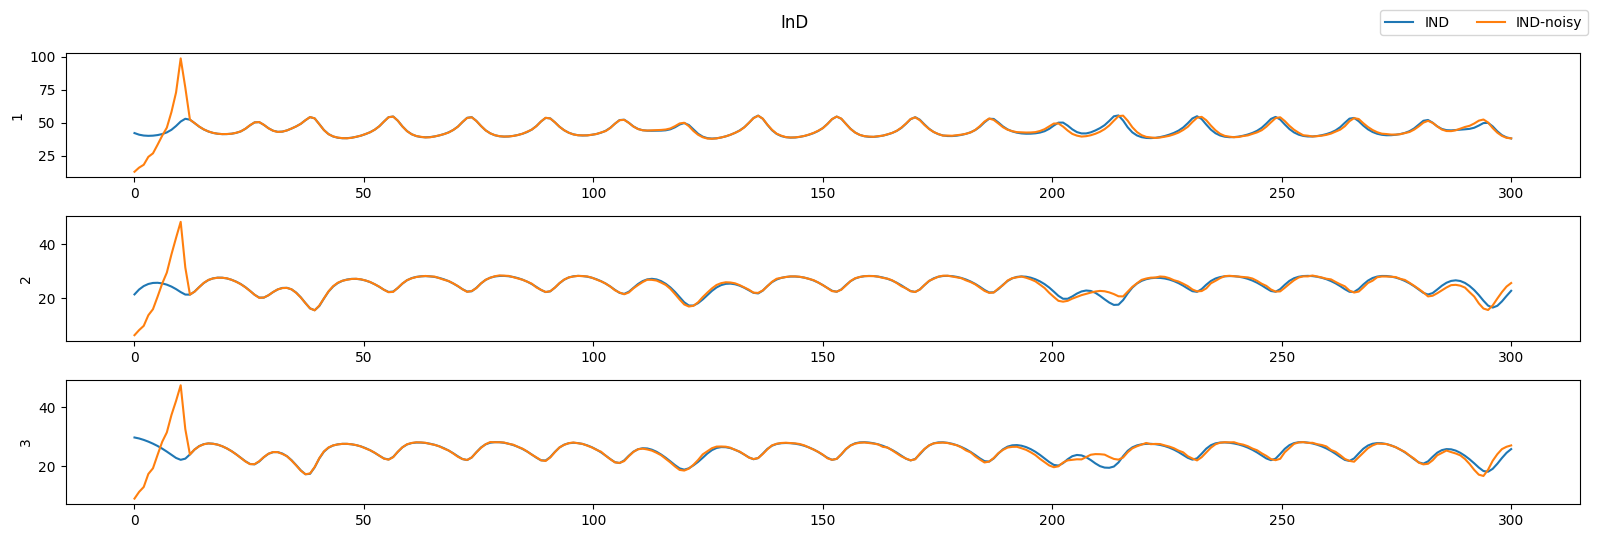

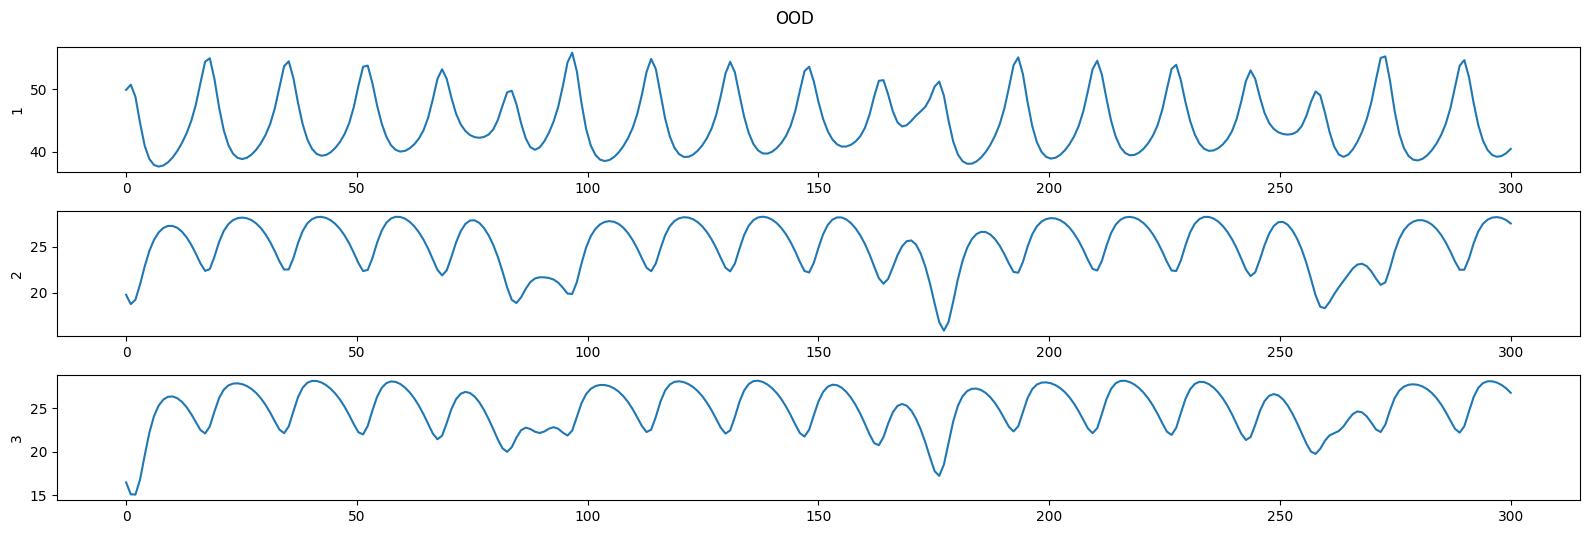

(<Figure size 1600x540 with 3 Axes>, [])

In [58]:
plot([x, x_noisy], timesteps, legend_labels=["IND", "IND-noisy"], max_oscillators=3, title="InD")
plot([y], timesteps,  max_oscillators=3, title="OOD")

In [80]:
latent_dim = 30
embed_dim = latent_dim
n = 1
timesteps = 100
system = SystemChecker(KuramotoSystem(latent_dim, embed_dim, seed=100))
algo = AlgorithmChecker(LinearRegression(embed_dim, timesteps, max_control_cost=0, seed=100))

x0 = system.make_init_conds(n)
y0_in = system.make_init_conds(n, in_dist=True)
y0_out = system.make_init_conds(n, in_dist=False)

x = system.make_data(x0, timesteps=timesteps, control=None, noisy=False)
algo.fit(x)

y_in = system.make_data(y0_in, timesteps=timesteps, control=None, noisy=False)
y_out = system.make_data(y0_out, timesteps=timesteps, control=None, noisy=False)
 
y_in_pred = algo.predict(y_in[:, 0], timesteps)
y_in_err = system.calc_error(y_in, y_in_pred)

y_out_pred = algo.predict( y_out[:, 0], timesteps)
y_out_err = system.calc_error(y_out, y_out_pred)

print(f"{y_in_err=}, {y_out_err=}")
# plot([x, x_noisy, y], timesteps, gridlabels=["IND", "IND-noisy", "OOD"], max_lines=100)
# plot([[y_in_pred, y_in], [y_out_pred, y_out], [y_out_pred, y_out]], timesteps, dataset_labels=["INDIST", "OOD"], legend_labels=["pred", "true"],  max_lines=15)


y_in_err=81.9500518298832, y_out_err=122.11937203241597


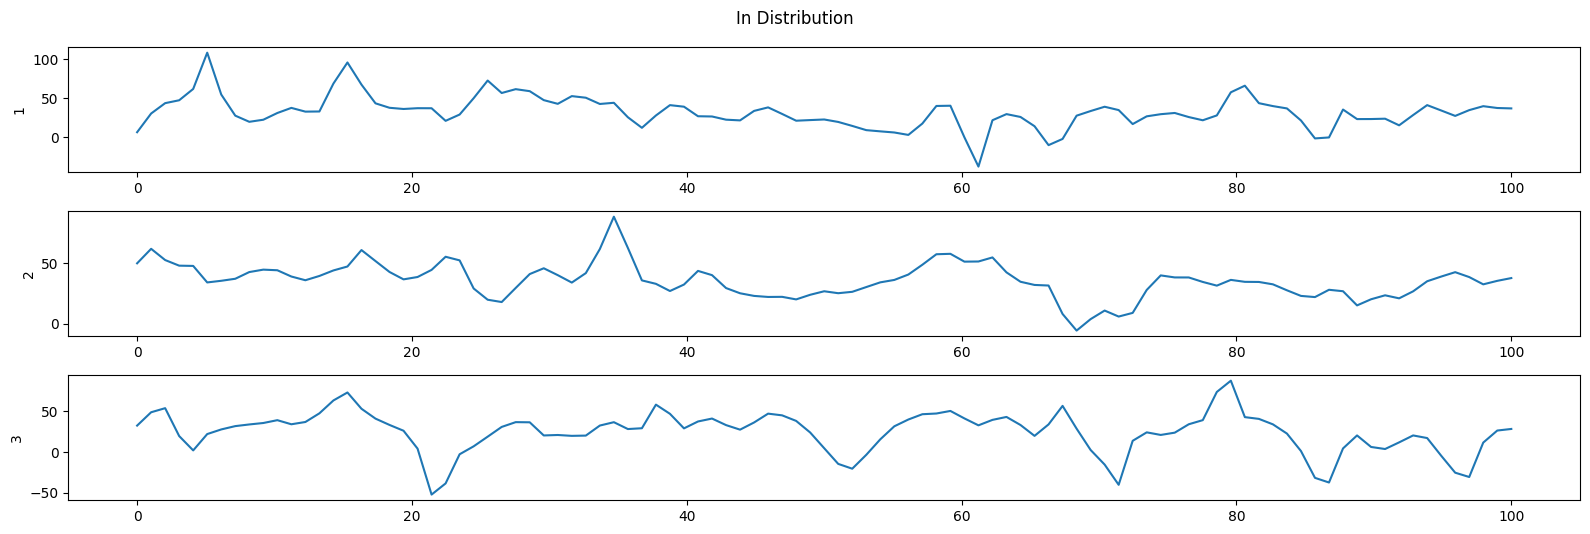

(<Figure size 1600x540 with 3 Axes>, [])

In [82]:
plot([y_in], timesteps,  max_oscillators=3, title="In Distribution", phase_dynamics=True)

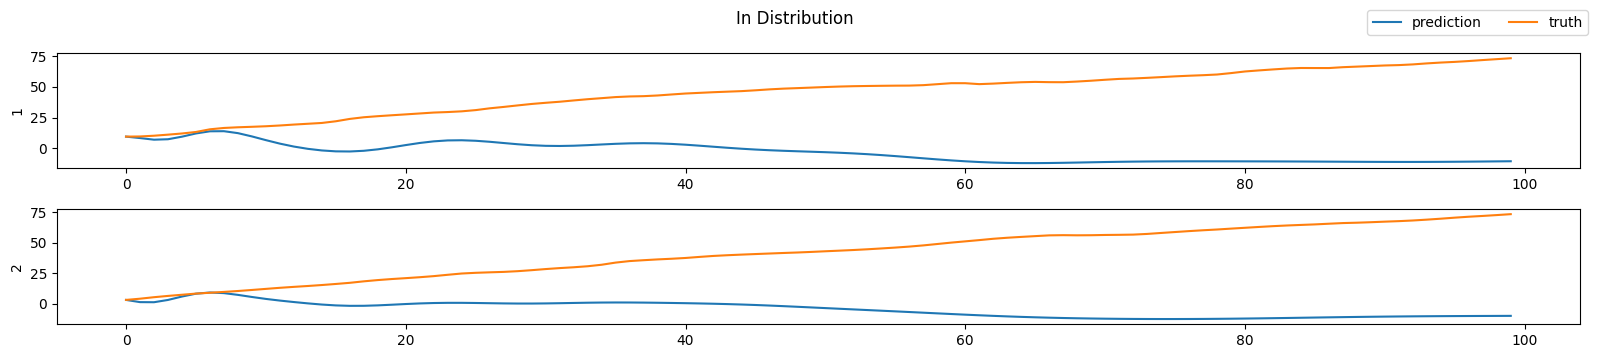

True


In [87]:
plot([y_in_pred, y_in], timesteps, legend_labels=["prediction", "truth"],  max_oscillators=2, title="In Distribution", phase_dynamics=False)

#print first timestep of y_in_pred and y_in